# Text Preprocessing

In [2]:
# 1
import pandas as pd
import yaml
import os
import pathlib

ROOT = pathlib.Path().resolve().parent.parent

with open(ROOT / "config.yml", "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

DATA_PATH = ROOT / config['api']['DATA_PATH']

In [3]:
# 2

comments = pd.read_excel('data/comments.xlsx')

In [4]:
print(comments.shape)

(8497, 22)


In [5]:
# 3
comments = comments.dropna(subset=['snippet.textOriginal'])

In [6]:
# 4

comments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8495 entries, 0 to 8496
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   kind                           8495 non-null   object 
 1   etag                           8495 non-null   object 
 2   id                             8495 non-null   object 
 3   snippet.videoId                8495 non-null   object 
 4   snippet.textDisplay            8495 non-null   object 
 5   snippet.textOriginal           8495 non-null   object 
 6   snippet.authorDisplayName      8492 non-null   object 
 7   snippet.authorProfileImageUrl  8495 non-null   object 
 8   snippet.authorChannelUrl       8495 non-null   object 
 9   snippet.authorChannelId.value  8495 non-null   object 
 10  snippet.canRate                8495 non-null   bool   
 11  snippet.viewerRating           8495 non-null   object 
 12  snippet.likeCount              8495 non-null   int64 

# Текст процессинг

In [7]:
# 5

corpora = list(comments['snippet.textOriginal'].values)

In [8]:
# 6

# download stopwords corpus, you need to run it once
import nltk
nltk.download("stopwords")
#--------#

from nltk.corpus import stopwords
from pymystem3 import Mystem
from string import punctuation


#Create lemmatizer and stopwords list
mystem = Mystem()
russian_stopwords = stopwords.words("russian")

", ".join(russian_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andrey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'и, в, во, не, что, он, на, я, с, со, как, а, то, все, она, так, его, но, да, ты, к, у, же, вы, за, бы, по, только, ее, мне, было, вот, от, меня, еще, нет, о, из, ему, теперь, когда, даже, ну, вдруг, ли, если, уже, или, ни, быть, был, него, до, вас, нибудь, опять, уж, вам, ведь, там, потом, себя, ничего, ей, может, они, тут, где, есть, надо, ней, для, мы, тебя, их, чем, была, сам, чтоб, без, будто, чего, раз, тоже, себе, под, будет, ж, тогда, кто, этот, того, потому, этого, какой, совсем, ним, здесь, этом, один, почти, мой, тем, чтобы, нее, сейчас, были, куда, зачем, всех, никогда, можно, при, наконец, два, об, другой, хоть, после, над, больше, тот, через, эти, нас, про, всего, них, какая, много, разве, три, эту, моя, впрочем, хорошо, свою, этой, перед, иногда, лучше, чуть, том, нельзя, такой, им, более, всегда, конечно, всю, между'

In [21]:
# 7 Preprocess functions

import string
import re

PUNCT_TO_REMOVE = string.punctuation

def remove_tabs(text): #убираем дичь со специальными символами
    return text.translate(str.maketrans("\n\t\r", "   "))

def remove_punct(text):
    return re.sub(r'[^a-zA-Zа-яА-ЯёЁ]+',' ', text)

def remove_urls(text):
    return re.sub(r'http\S+', '', text, flags=re.MULTILINE)

def remove_mentions(text):
    return re.sub("@[A-Za-z0-9_]+","", text)

def remove_hashtags(text):
    return re.sub("#[A-Za-z0-9_]+","", text)

def clean_text(text: str)->str:
    text = remove_urls(text)
    text = remove_tabs(text)
    text = remove_mentions(text)
    text = remove_hashtags(text)

    return text


def preprocess_text(text: str) -> str:

    text = remove_punct(text)

    tokens = mystem.lemmatize(text.lower())

    tokens = [token for token in tokens if token not in russian_stopwords\
              and token != " " \
              and token.strip() not in punctuation]

    text = " ".join(tokens)

    return text

In [22]:
# 7 Preprocessing example

test = corpora[14]

print(test)
print()
print('='*10 + 'After' + '='*10)
print()
print(preprocess_text(clean_text(test)))

Ооо, я себе на днях палетку купила, очень нравится! ❤

==========After==========

ооо день палетка купить очень нравиться


In [23]:
# 8 Preprocessing example

cleaned_text = [clean_text(t) for t in corpora]

comments['cleaned_text'] = cleaned_text

In [24]:
# 9 Preprocessing example

lemmatized = [preprocess_text(s) for s in cleaned_text]

comments['lemmatized_text'] = lemmatized

In [25]:
comments

,kind,etag,id,snippet.videoId,snippet.textDisplay,snippet.textOriginal,snippet.authorDisplayName,snippet.authorProfileImageUrl,snippet.authorChannelUrl,snippet.authorChannelId.value,...,snippet.updatedAt,snippet.canReply,snippet.totalReplyCount,snippet.isPublic,replies.comments,snippet.moderationStatus,real_comments_cnt,snippet.parentId,cleaned_text,lemmatized_text
0,youtube#commentThread,lqN0Zzupy-0f_AAASt7gKLOZalc,Ugz57x-YZSYddlWifIt4AaABAg,vzdPoXX2UBM,До Хян! Спасибо большое за новое видео 🫶🏻 обож...,До Хян! Спасибо большое за новое видео 🫶🏻 обож...,Alex Yost,https://yt3.ggpht.com/ytc/AGIKgqNjg7gvFa7b6j1c...,http://www.youtube.com/channel/UCTaEjHhPIMJXRN...,UCTaEjHhPIMJXRNzqcx54jtg,...,2023-06-01T21:53:57Z,1.0,0.0,1.0,NaN,NaN,0.0,-1,До Хян! Спасибо большое за новое видео 🫶🏻 обож...,хян спасибо большой новый видео обожать просто...
1,youtube#commentThread,FSr6OFvRbevOro7VVmOb-ANmVF0,Ugzqfh0Visn0OYf_EZN4AaABAg,vzdPoXX2UBM,Бо Хян онни❤на озоне продавали товары от вас-B...,Бо Хян онни❤на озоне продавали товары от вас-B...,Aska Yuska,https://yt3.ggpht.com/ytc/AGIKgqNbP5fGCsLeQA3b...,http://www.youtube.com/channel/UCIKYk4-5rFZs3r...,UCIKYk4-5rFZs3ry8zgJesHA,...,2023-05-31T08:09:51Z,1.0,0.0,1.0,NaN,NaN,0.0,-1,Бо Хян онни❤на озоне продавали товары от вас-B...,бо хян онни озон продавать товар bonya s pouch...
2,youtube#commentThread,ycRzG8zBi19WCF6USiBGOR_9l5w,UgxAyZkv4V1m1sm-aUt4AaABAg,vzdPoXX2UBM,Классные средства! В вашем магазине на Озон бу...,Классные средства! В вашем магазине на Озон бу...,Ирина Крылова,https://yt3.ggpht.com/ytc/AGIKgqP2ASGZlu-D33_F...,http://www.youtube.com/channel/UC1yEbLPPcFEZX6...,UC1yEbLPPcFEZX6RRuWwjp4g,...,2023-05-30T18:58:19Z,1.0,0.0,1.0,NaN,NaN,0.0,-1,Классные средства! В вашем магазине на Озон бу...,классный средство ваш магазин озон новинка mix...
3,youtube#commentThread,taeWHMsCs91UCrTujiIuJEGrmcs,UgwHEEpAHbCqWdjzy494AaABAg,vzdPoXX2UBM,спасибо за видео),спасибо за видео),Ustalaya,https://yt3.ggpht.com/ytc/AGIKgqNTnXNpcPMQpsvH...,http://www.youtube.com/channel/UCJU-KEQgK7Y14P...,UCJU-KEQgK7Y14POdao_6uCg,...,2023-05-28T18:54:48Z,1.0,0.0,1.0,NaN,NaN,0.0,-1,спасибо за видео),спасибо видео
4,youtube#commentThread,6XEm3qL2GdKiNxA2Lkmnrnb4P3I,Ugz2C__gg0nt3MuuZXZ4AaABAg,vzdPoXX2UBM,А можно будет сделать обзор про средства для п...,А можно будет сделать обзор про средства для п...,Olga M,https://yt3.ggpht.com/ytc/AGIKgqPJ5KmbaRTSJwLo...,http://www.youtube.com/channel/UCURgXlOeRejxcY...,UCURgXlOeRejxcYKwZU-vz7w,...,2023-05-28T10:35:17Z,1.0,0.0,1.0,NaN,NaN,0.0,-1,А можно будет сделать обзор про средства для п...,сделать обзор средство проблема мешок глаз тем...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8492,youtube#comment,SrLNUEzqeGp81VWedKPEbMDJBq4,Ugw_CW1RnR68GyuxVEl4AaABAg.9kGNFIgGa7Z9mhGVoE-2yy,BFcjeM3V3dc,@🦋Полина 🦋 💖,@🦋Полина 🦋 💖,Марьям,https://yt3.ggpht.com/gFdhsGyMU2GXNAZLOYO4gtqJ...,http://www.youtube.com/channel/UCQUuAGFrJthPST...,UCQUuAGFrJthPSTu8GeF67oQ,...,2023-03-01T03:07:00Z,NaN,NaN,NaN,NaN,NaN,NaN,Ugw_CW1RnR68GyuxVEl4AaABAg,@🦋Полина 🦋 💖,полина
8493,youtube#comment,jQEOTB8DJ1NQkjRXIajt_wklkDQ,Ugw_CW1RnR68GyuxVEl4AaABAg.9kGNFIgGa7Z9mhGUf7zXrY,BFcjeM3V3dc,@Margo Aravin 💓,@Margo Aravin 💓,Марьям,https://yt3.ggpht.com/gFdhsGyMU2GXNAZLOYO4gtqJ...,http://www.youtube.com/channel/UCQUuAGFrJthPST...,UCQUuAGFrJthPSTu8GeF67oQ,...,2023-03-01T03:06:51Z,NaN,NaN,NaN,NaN,NaN,NaN,Ugw_CW1RnR68GyuxVEl4AaABAg,Aravin 💓,aravin
8494,youtube#comment,80_51kGA0llynKoz12AVpUyYvjk,Ugw_CW1RnR68GyuxVEl4AaABAg.9kGNFIgGa7Z9mdL-sHQSpe,BFcjeM3V3dc,И я,И я,Margo Aravin,https://yt3.ggpht.com/ytc/AGIKgqOBhMBgYvBwoSyA...,http://www.youtube.com/channel/UC1ar9sOW7t0niW...,UC1ar9sOW7t0niWfkWHeqcBQ,...,2023-02-27T14:29:22Z,NaN,NaN,NaN,NaN,NaN,NaN,Ugw_CW1RnR68GyuxVEl4AaABAg,И я,
8495,youtube#comment,sdw_wTTarV0WBX4404R5jUy912Y,Ugw_CW1RnR68GyuxVEl4AaABAg.9kGNFIgGa7Z9mbG4-_uJfw,BFcjeM3V3dc,Это Я,Это Я,🦋Полина 🦋,https://yt3.ggpht.com/432OqfqNjILbDGMPCCcTTnPq...,http://www.youtube.com/channel/U

### Оценка количества слов

In [26]:
comments['lem_word_count'] = comments['lemmatized_text'].apply(lambda x: len(x.split()))
comments['lem_sym_count'] = comments['lemmatized_text'].apply(lambda x: len(x))

In [27]:
comments['lem_word_count'].describe()

count    8495.000000
mean       10.296410
std        13.438203
min         0.000000
25%         3.000000
50%         6.000000
75%        12.000000
max       295.000000
Name: lem_word_count, dtype: float64

<AxesSubplot: >

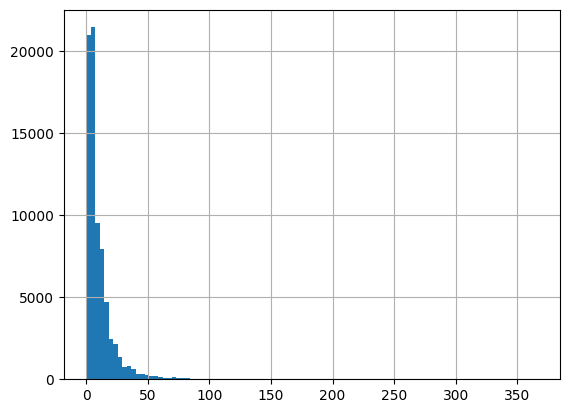

In [17]:
comments['lem_word_count'].hist(bins=100)

In [18]:
comments['lem_sym_count'].describe()

count    74949.000000
mean        78.322526
std        102.385678
min          0.000000
25%         23.000000
50%         48.000000
75%         95.000000
max       3244.000000
Name: lem_sym_count, dtype: float64

<AxesSubplot: >

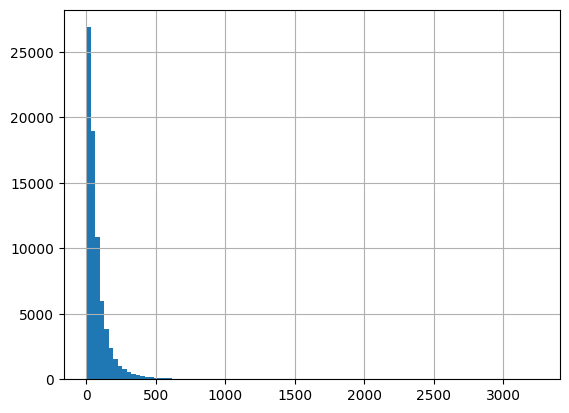

In [19]:
comments['lem_sym_count'].hist(bins=100)

Большинство наблюдений не превышает 50 слов в комментариях
Большинство наблюдений не превышает 200 символов в комментариях

# Оценка токенов

In [28]:
from nltk import word_tokenize

all_text = [word_tokenize(line) for line in lemmatized]

In [29]:
from nltk import FreqDist


n_types = []
n_tokens = []
fd = FreqDist()
for line in all_text:
    fd.update(line)
    n_types.append(len(fd))
    n_tokens.append(sum(list(fd.values())))
for i in fd.most_common(10):
    print(i)

('это', 1491)
('очень', 1230)
('кожа', 1124)
('видео', 1029)
('спасибо', 824)
('косметика', 745)
('весь', 596)
('крем', 574)
('просто', 546)
('макияж', 543)


## Закон Ципфа
В любом достаточно большом тексте ранг типа обратно пропорционален его частоте: f=a/r

f – частота типа, r – ранг типа, a – параметр, для славянских языков – около 0.07

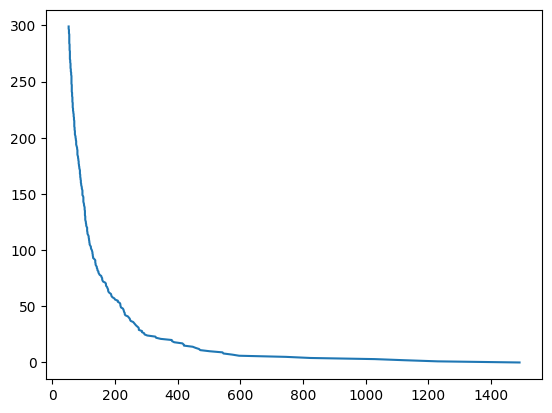

In [30]:
import matplotlib.pyplot as plt

freqs = list(fd.values())
freqs = sorted(freqs, reverse = True)

fig, ax = plt.subplots()
ax.plot(freqs[:300], range(300))
plt.show()

## Закон Хипса
С увеличением длины текста (количества токенов), количество типов увеличивается в соответствии с законом: |V|=K∗N^b

N – число токенов, |V| – количество типов в словаре, K,b – параметры, обычно K∈[10,100],b∈[0.4,0.6]

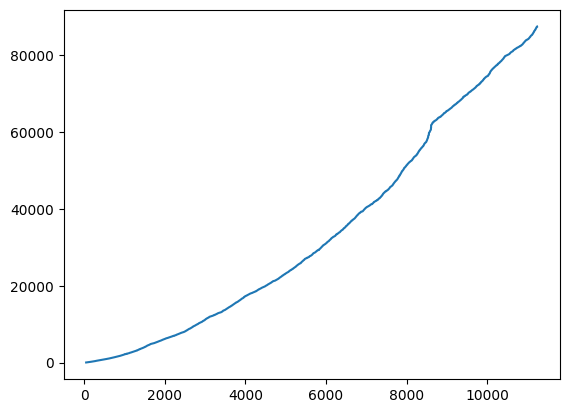

In [31]:
fig, ax = plt.subplots()
ax.plot(n_types, n_tokens)
plt.show()

# Фильтр для анализа

Для улучшения параметров моделирования рекомендуется использоваться относительно большие тексты комментариев

Одновременно с этим мы уменьшим количество текстов для анализа


In [32]:
comments['lem_word_count'].describe()

count    8495.000000
mean       10.296410
std        13.438203
min         0.000000
25%         3.000000
50%         6.000000
75%        12.000000
max       295.000000
Name: lem_word_count, dtype: float64

In [33]:
selected_cmts = comments[comments['lem_word_count'] >= 6]



In [34]:
vars = ['id',
        'snippet.videoId',
        'snippet.textDisplay',
        'snippet.textOriginal',
        'snippet.authorDisplayName',
        'snippet.parentId',
        'cleaned_text',
        'lemmatized_text'
        ]

selected_cmts.to_csv('data/comments_all.csv', sep='\t', index=False)
selected_cmts[vars].to_csv('data/comments_text.csv', sep='\t', index=False)

In [35]:
selected_cmts

,kind,etag,id,snippet.videoId,snippet.textDisplay,snippet.textOriginal,snippet.authorDisplayName,snippet.authorProfileImageUrl,snippet.authorChannelUrl,snippet.authorChannelId.value,...,snippet.totalReplyCount,snippet.isPublic,replies.comments,snippet.moderationStatus,real_comments_cnt,snippet.parentId,cleaned_text,lemmatized_text,lem_word_count,lem_sym_count
0,youtube#commentThread,lqN0Zzupy-0f_AAASt7gKLOZalc,Ugz57x-YZSYddlWifIt4AaABAg,vzdPoXX2UBM,До Хян! Спасибо большое за новое видео 🫶🏻 обож...,До Хян! Спасибо большое за новое видео 🫶🏻 обож...,Alex Yost,https://yt3.ggpht.com/ytc/AGIKgqNjg7gvFa7b6j1c...,http://www.youtube.com/channel/UCTaEjHhPIMJXRN...,UCTaEjHhPIMJXRNzqcx54jtg,...,0.0,1.0,NaN,NaN,0.0,-1,До Хян! Спасибо большое за новое видео 🫶🏻 обож...,хян спасибо большой новый видео обожать просто...,50,385
1,youtube#commentThread,FSr6OFvRbevOro7VVmOb-ANmVF0,Ugzqfh0Visn0OYf_EZN4AaABAg,vzdPoXX2UBM,Бо Хян онни❤на озоне продавали товары от вас-B...,Бо Хян онни❤на озоне продавали товары от вас-B...,Aska Yuska,https://yt3.ggpht.com/ytc/AGIKgqNbP5fGCsLeQA3b...,http://www.youtube.com/channel/UCIKYk4-5rFZs3r...,UCIKYk4-5rFZs3ry8zgJesHA,...,0.0,1.0,NaN,NaN,0.0,-1,Бо Хян онни❤на озоне продавали товары от вас-B...,бо хян онни озон продавать товар bonya s pouch...,26,184
2,youtube#commentThread,ycRzG8zBi19WCF6USiBGOR_9l5w,UgxAyZkv4V1m1sm-aUt4AaABAg,vzdPoXX2UBM,Классные средства! В вашем магазине на Озон бу...,Классные средства! В вашем магазине на Озон бу...,Ирина Крылова,https://yt3.ggpht.com/ytc/AGIKgqP2ASGZlu-D33_F...,http://www.youtube.com/channel/UC1yEbLPPcFEZX6...,UC1yEbLPPcFEZX6RRuWwjp4g,...,0.0,1.0,NaN,NaN,0.0,-1,Классные средства! В вашем магазине на Озон бу...,классный средство ваш магазин озон новинка mix...,7,50
4,youtube#commentThread,6XEm3qL2GdKiNxA2Lkmnrnb4P3I,Ugz2C__gg0nt3MuuZXZ4AaABAg,vzdPoXX2UBM,А можно будет сделать обзор про средства для п...,А можно будет сделать обзор про средства для п...,Olga M,https://yt3.ggpht.com/ytc/AGIKgqPJ5KmbaRTSJwLo...,http://www.youtube.com/channel/UCURgXlOeRejxcY...,UCURgXlOeRejxcYKwZU-vz7w,...,0.0,1.0,NaN,NaN,0.0,-1,А можно будет сделать обзор про средства для п...,сделать обзор средство проблема мешок глаз тем...,15,110
6,youtube#commentThread,JR1nxqvPS4CNLG9TN9ndWcN3t_A,Ugx7wn9TGfLnjUweill4AaABAg,vzdPoXX2UBM,"Спасибо! Очень полезная информация, особенно п...","Спасибо! Очень полезная информация, особенно п...",Olga M,https://yt3.ggpht.com/ytc/AGIKgqPJ5KmbaRTSJwLo...,http://www.youtube.com/channel/UCURgXlOeRejxcY...,UCURgXlOeRejxcYKwZU-vz7w,...,0.0,1.0,NaN,NaN,0.0,-1,"Спасибо! Очень полезная информация, особенно п...",спасибо очень полезный информация особенно кре...,9,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8480,youtube#comment,pOQKENRj5S74RJHHPMr6vHmbmao,UgypHLKZCveCjfaQyth4AaABAg.9qKB7dyWjFe9qKCz4Xk57L,KDhOg88LRxE,"Мне он ничего не подчеркивает, люблю его всей ...","Мне он ничего не подчеркивает, люблю его всей ...",Дарья Логачева,https://yt3.ggpht.com/ytc/AGIKgqM9sjgPbPIxljQO...,http://www.youtube.com/channel/UCiiXbYKzHFNdVx...,UCiiXbYKzHFNdVxetmcJ0iDA,...,NaN,NaN,NaN,NaN,NaN,UgypHLKZCveCjfaQyth4AaABAg,"Мне он ничего не подчеркивает, люблю его всей ...",ничто подчеркивать любить весь душа свой комби...,21,143
8481,youtube#comment,tgg3QsGW5WM3sDDNUCJ8FEdKTrA,UgyyAVRq5tzV5Sft8Eh4AaABAg.9qK84NHl_3M9qKBFYMsh1q,KDhOg88LRxE,"​@Inga Sivceva вот кстати его плюс да, что не ...","​@Inga Sivceva вот кстати его плюс да, что не ...",Оливия Фокс,https://yt3.ggpht.com/ytc/AGIKgqM-2HDD-8tinnzI...,http://www.youtube.com/channel/UC_oJRkf-97Ste7...,UC_oJRkf-97Ste7SUSxZ0pjw,...,NaN,NaN,NaN,NaN,NaN,UgyyAVRq5tzV5Sft8Eh4AaABAg,"​ Sivceva вот кстати его плюс да, что не окисл...",sivceva кстати плюс окисляться количество фейк...,8,55
8482,youtube#comment,_XSqiPRFVPXr2CVXAIbLFVmfups,UgyyAVRq5tzV5Sft8Eh4AaABAg.9qK84NHl_3M9qKB8OG4Zw9,KDhOg88LRxE,"У Миши очень много фейка, они как раз очень жи...","У Миши очень много фейка, они как раз очень жи...",Inga Sivc